# EDA 프로젝트

In [190]:

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
from selenium.webdriver.common.keys import Keys
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
import matplotlib.font_manager as fm
import mysql.connector
import time
import colorsys 

### 작년 농산물 증감률

In [194]:
Korea_price_df = pd.read_excel("../data/증감률.xlsx")
Korea_price_df  

,품목별,2023.4/4,2023.3/4,2023.2/4,2023.1/4
0,파,36.5,-1.9,12.1,27.1
1,사과,62.1,37.1,5.4,-6.3
2,양파,-5.6,3.2,34.0,40.7
3,배,23.1,-9.2,-21.1,-20.0
4,고구마,13.0,17.5,4.1,-1.9
5,복숭아,44.3,22.2,-7.0,-10.0
6,마늘,-12.0,-12.3,-4.6,2.4
7,수박,34.1,17.7,-3.9,-10.0
8,시금치,10.0,-4.3,-4.4,-10.2
9,감자,-6.0,-3.8,6.1,11.3


In [195]:
Korea_price4_df = Korea_price_df.sort_values(by='2023.4/4', ascending=False)
Korea_price4_df

,품목별,2023.4/4,2023.3/4,2023.2/4,2023.1/4
1,사과,62.1,37.1,5.4,-6.3
5,복숭아,44.3,22.2,-7.0,-10.0
0,파,36.5,-1.9,12.1,27.1
7,수박,34.1,17.7,-3.9,-10.0
30,토마토,32.6,20.7,4.2,-11.0
24,딸기,30.6,23.1,6.2,-7.6
25,상추,27.7,-4.3,3.3,22.6
26,오이,24.4,-8.4,14.2,28.2
10,감,23.1,-16.9,-17.6,-18.4
3,배,23.1,-9.2,-21.1,-20.0


In [196]:
Korea_price4_df = Korea_price4_df[['품목별', '2023.4/4']]
Korea_price4_df.head()

,품목별,2023.4/4
1,사과,62.1
5,복숭아,44.3
0,파,36.5
7,수박,34.1
30,토마토,32.6


In [197]:
Korea_price3_df = Korea_price_df.sort_values(by='2023.3/4', ascending=False)
Korea_price3_df.head()

,품목별,2023.4/4,2023.3/4,2023.2/4,2023.1/4
1,사과,62.1,37.1,5.4,-6.3
17,귤,17.4,30.6,13.7,14.3
35,당근,10.4,30.2,32.3,52.5
24,딸기,30.6,23.1,6.2,-7.6
5,복숭아,44.3,22.2,-7.0,-10.0


In [198]:
Korea_price3_df = Korea_price3_df[['품목별', '2023.3/4']]
Korea_price3_df.head()

,품목별,2023.3/4
1,사과,37.1
17,귤,30.6
35,당근,30.2
24,딸기,23.1
5,복숭아,22.2


In [199]:
Korea_price2_df = Korea_price_df.sort_values(by='2023.2/4', ascending=False)
Korea_price2_df.head()

,품목별,2023.4/4,2023.3/4,2023.2/4,2023.1/4
2,양파,-5.6,3.2,34.0,40.7
35,당근,10.4,30.2,32.3,52.5
31,브로콜리,11.0,12.3,18.1,-13.1
26,오이,24.4,-8.4,14.2,28.2
17,귤,17.4,30.6,13.7,14.3


In [200]:
Korea_price2_df = Korea_price2_df[['품목별', '2023.2/4']]
Korea_price2_df.head()

,품목별,2023.2/4
2,양파,34.0
35,당근,32.3
31,브로콜리,18.1
26,오이,14.2
17,귤,13.7


In [201]:
Korea_price1_df = Korea_price_df.sort_values(by='2023.1/4', ascending=False)
Korea_price1_df.head()

,품목별,2023.4/4,2023.3/4,2023.2/4,2023.1/4
35,당근,10.4,30.2,32.3,52.5
2,양파,-5.6,3.2,34.0,40.7
26,오이,24.4,-8.4,14.2,28.2
0,파,36.5,-1.9,12.1,27.1
25,상추,27.7,-4.3,3.3,22.6


In [202]:
Korea_price1_df = Korea_price1_df[['품목별', '2023.1/4']]
Korea_price1_df

,품목별,2023.1/4
35,당근,52.5
2,양파,40.7
26,오이,28.2
0,파,27.1
25,상추,22.6
32,양배추,16.2
17,귤,14.3
19,미나리,13.7
29,참깨,13.3
28,파프리카,13.0


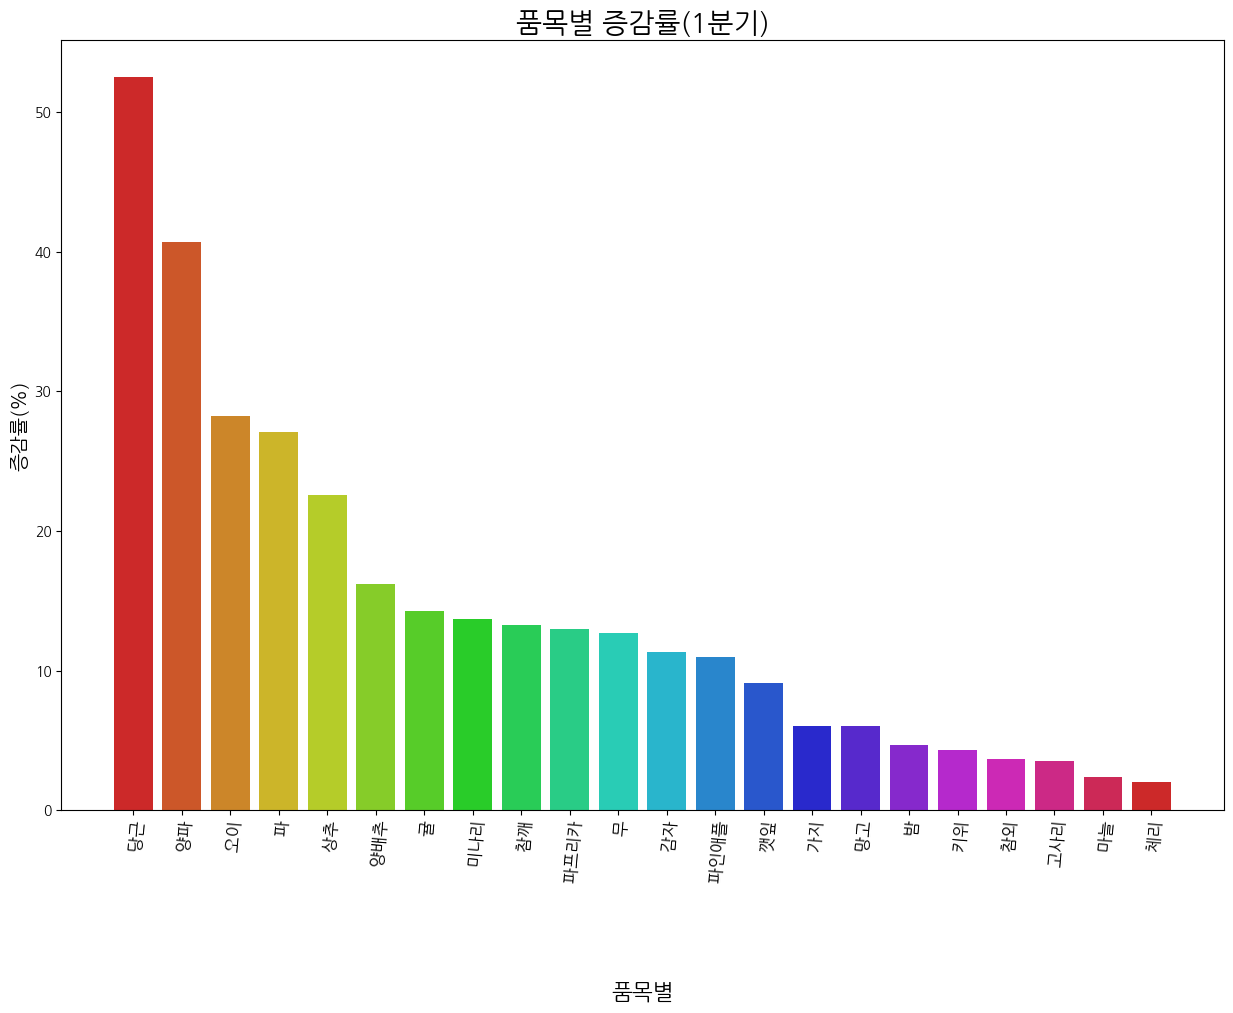

In [216]:
Korea_price1_positive_df = Korea_price1_df[Korea_price1_df['2023.1/4'] >= 0]
Korea_price1_positive_df = Korea_price1_positive_df.sort_values(by='2023.1/4', ascending=False)

hue_values = np.linspace(0, 1, len(Korea_price1_positive_df['품목별'].unique()))
saturation = 0.8
value = 0.8

plt.figure(figsize=(15, 10))
for i, group in enumerate(Korea_price1_positive_df['품목별'].unique()):
    data = Korea_price1_positive_df[Korea_price1_positive_df['품목별'] == group]
    
    color = colorsys.hsv_to_rgb(hue_values[i], saturation, value)
    plt.bar(group, data['2023.1/4'].max(), color=color)

plt.title('품목별 증감률(1분기)', fontsize=20)
plt.xlabel('품목별', fontsize=16)  
plt.ylabel('증감률(%)', fontsize=14)
plt.xticks(rotation=85, fontsize=12) 
plt.show()

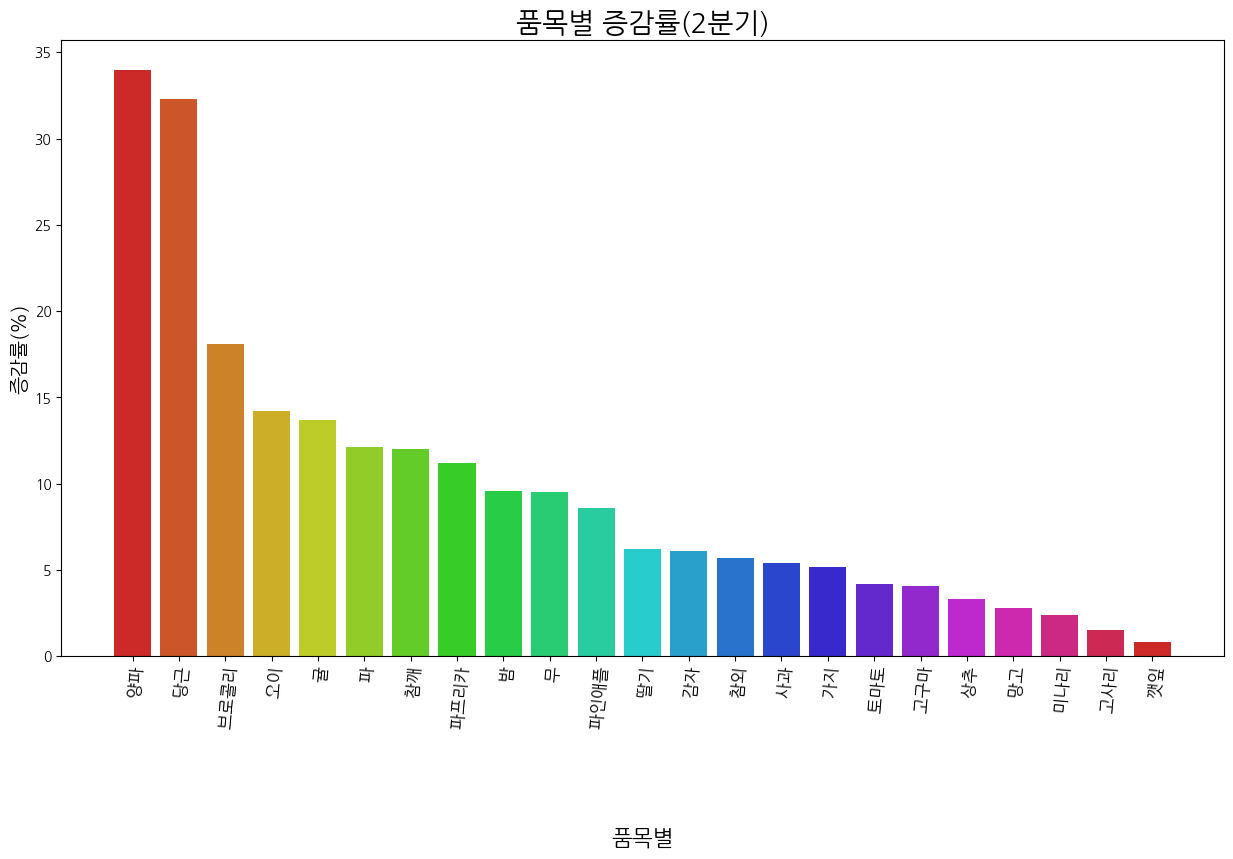

In [220]:
Korea_price2_positive_df = Korea_price2_df[Korea_price2_df['2023.2/4'] >= 0]
Korea_price2_positive_df = Korea_price2_positive_df.sort_values(by='2023.2/4', ascending=False)

hue_values = np.linspace(0, 1, len(Korea_price2_positive_df['품목별'].unique()))
saturation = 0.8
value = 0.8

plt.figure(figsize=(15, 8))
for i, group in enumerate(Korea_price2_positive_df['품목별'].unique()):
    data = Korea_price2_positive_df[Korea_price2_positive_df['품목별'] == group]
    color = colorsys.hsv_to_rgb(hue_values[i], saturation, value)
    plt.bar(group, data['2023.2/4'].max(), color=color)

plt.title('품목별 증감률(2분기)', fontsize=20)
plt.xlabel('품목별', fontsize=16)
plt.ylabel('증감률(%)', fontsize=14)
plt.xticks(rotation=85, fontsize=12) 
plt.show()


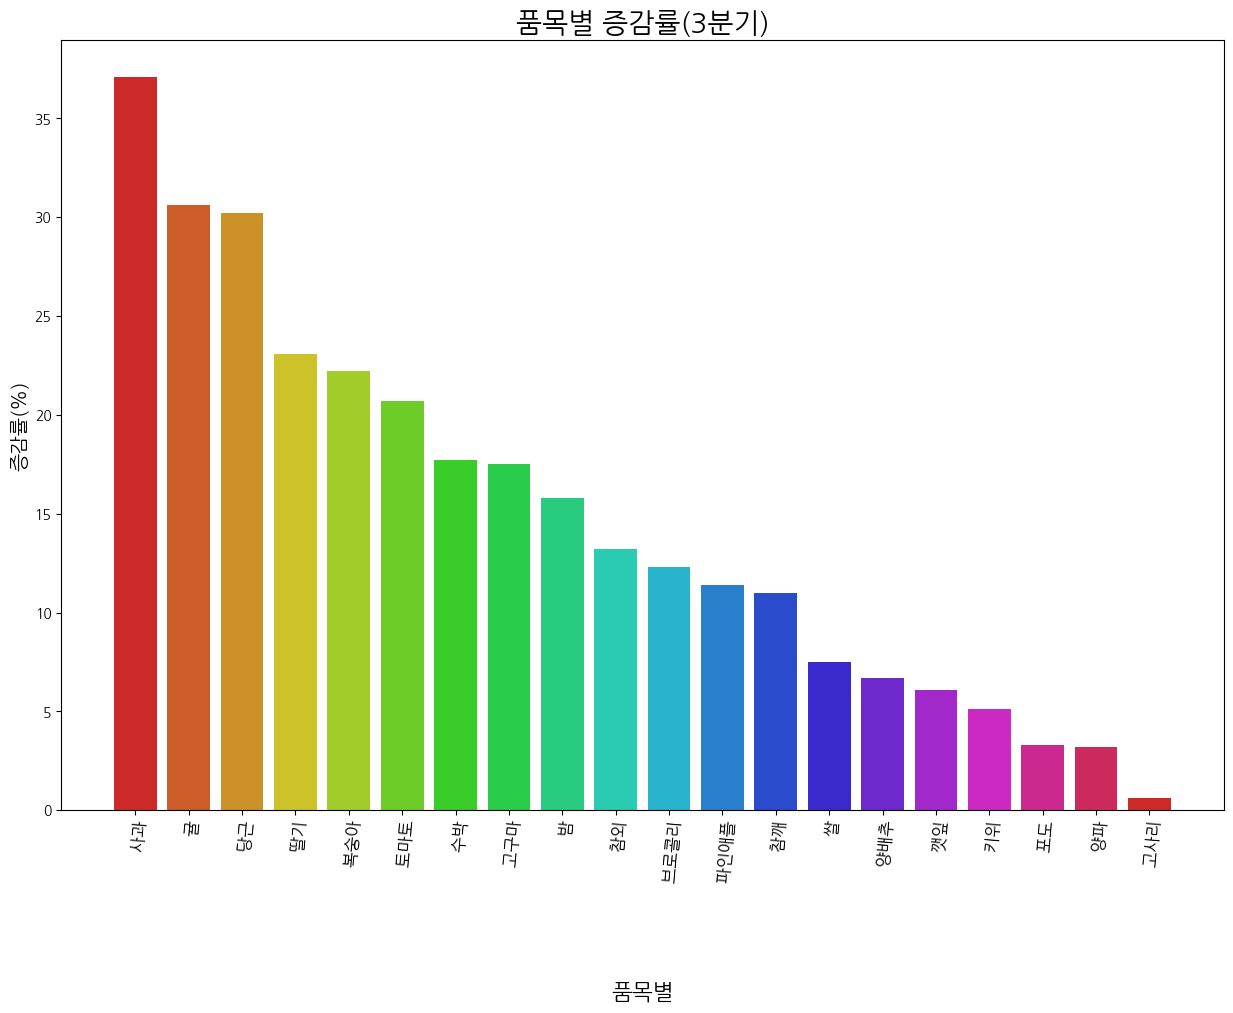

In [221]:
Korea_price3_positive_df = Korea_price3_df[Korea_price3_df['2023.3/4'] >= 0]
Korea_price3_positive_df = Korea_price3_positive_df.sort_values(by='2023.3/4', ascending=False)

hue_values = np.linspace(0, 1, len(Korea_price3_positive_df['품목별'].unique()))
saturation = 0.8
value = 0.8

plt.figure(figsize=(15, 10))
for i, group in enumerate(Korea_price3_positive_df['품목별'].unique()):
    data = Korea_price3_positive_df[Korea_price3_positive_df['품목별'] == group]
    color = colorsys.hsv_to_rgb(hue_values[i], saturation, value)
    plt.bar(group, data['2023.3/4'].max(), color=color)

plt.title('품목별 증감률(3분기)', fontsize=20)
plt.xlabel('품목별', fontsize=16)
plt.ylabel('증감률(%)', fontsize=14)
plt.xticks(rotation=85, fontsize=12) 
plt.show()


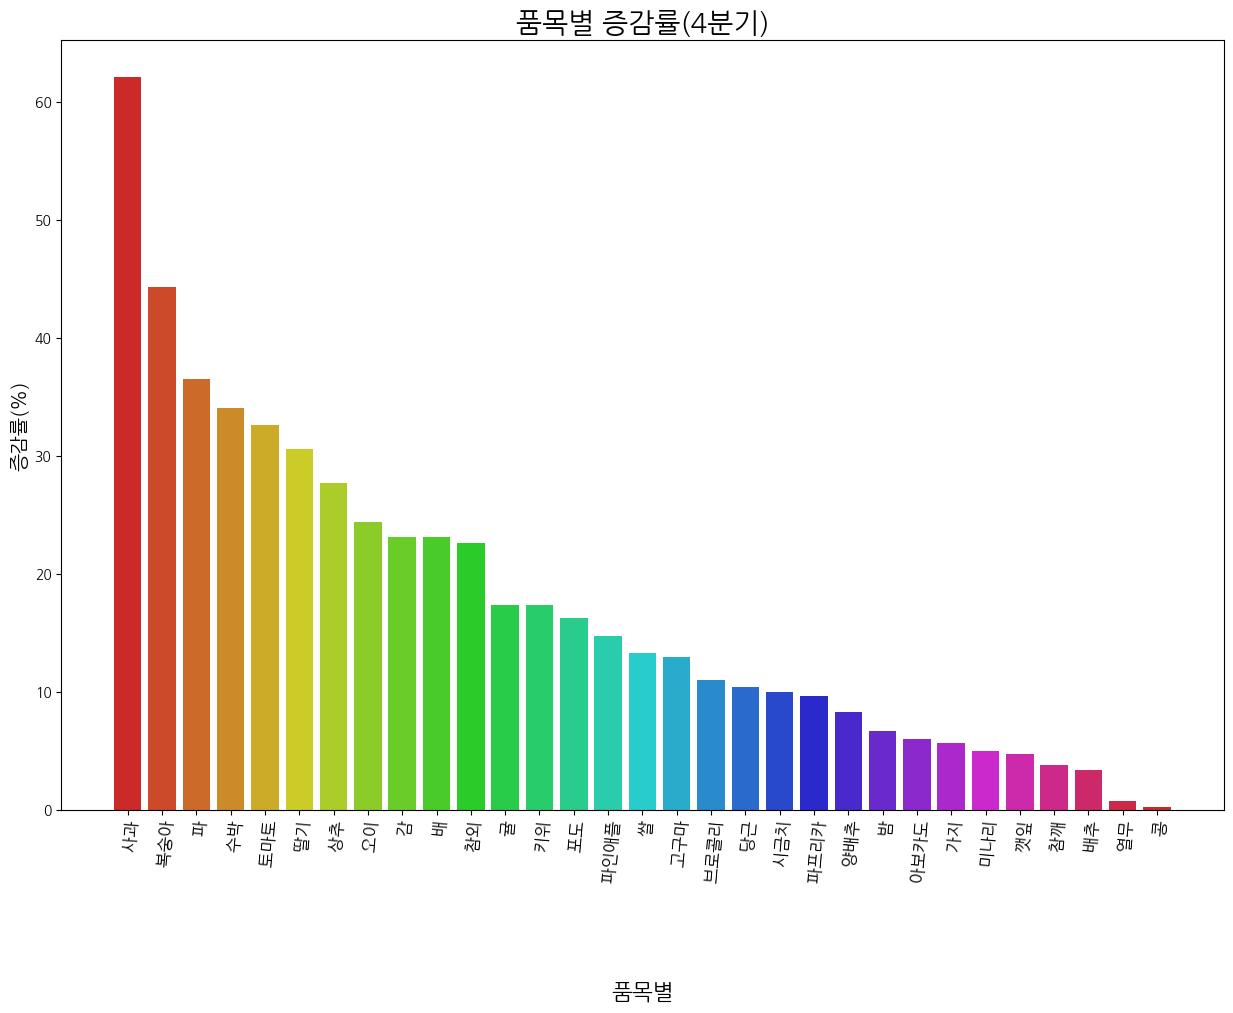

In [222]:
Korea_price4_positive_df = Korea_price4_df[Korea_price4_df['2023.4/4'] >= 0]
Korea_price4_positive_df = Korea_price4_positive_df.sort_values(by='2023.4/4', ascending=False)

hue_values = np.linspace(0, 1, len(Korea_price4_positive_df['품목별'].unique()))
saturation = 0.8
value = 0.8

plt.figure(figsize=(15, 10))
for i, group in enumerate(Korea_price4_positive_df['품목별'].unique()):
    data = Korea_price4_positive_df[Korea_price4_positive_df['품목별'] == group]
    color = colorsys.hsv_to_rgb(hue_values[i], saturation, value)
    plt.bar(group, data['2023.4/4'].max(), color=color)

plt.title('품목별 증감률(4분기)', fontsize=20)
plt.xlabel('품목별', fontsize=16)
plt.ylabel('증감률(%)', fontsize=14)
plt.xticks(rotation=85, fontsize=12) 
plt.show()


# 우리나라 농산물 소매 가격

In [2]:
driver = webdriver.Chrome(service=Service("../driver/chromedriver-linux64/chromedriver"))
url = "https://www.kamis.or.kr/customer/main/main.do"
driver.get(url)

In [3]:
food_prices, vegetable_prices, crop_prices, fruit_prices = [], [], [], []

data_ids = ["tab_tbl0101", "tab_tbl0201", "tab_tbl0301", "tab_tbl0401"]
data_lists = [food_prices, vegetable_prices, crop_prices, fruit_prices]

xpaths = [
    "/html/body/div[1]/div/section[1]/div/div[2]/ul/li[2]/h3",  
    "/html/body/div[1]/div/section[1]/div/div[2]/ul/li[3]/h3",  
    "/html/body/div[1]/div/section[1]/div/div[2]/ul/li[4]/h3",  
    "/html/body/div[1]/div/section[1]/div/div[2]/ul/li[5]/h3" 
]

for data_id, data_list, xpath in zip(data_ids, data_lists, xpaths):
    elements = driver.find_elements(By.ID, data_id)
    for element in elements:
        data_list.append(element.text)
    doc_link = driver.find_element(By.XPATH, xpath)
    doc_link.click()
    time.sleep(1) 

print("식량 작물 가격:", food_prices)
print("채소 가격:", vegetable_prices)
print("특용작물 가격:", crop_prices)
print("과일 가격:", fruit_prices)

driver.quit()


식량 작물 가격: ['품목 단위 가격(03.25) 등락률 전일 1개월전 1년전\n쌀/20kg 20kg 50,240 2.3% 51,424 55,498 50,645\n쌀/10kg 10kg 28,765 0.0% 28,755 28,730 -\n찹쌀/일반계 1kg 3,956 1.6% 3,892 3,677 3,663\n콩/흰 콩(국산) 500g 5,354 - 5,354 5,085 5,529\n팥/붉은 팥(국산) 500g 9,013 1.5% 8,883 8,360 7,877\n녹두/국산 500g 12,029 - 12,029 11,517 10,430\n고구마/밤 1kg 5,396 0.3% 5,378 5,389 5,373\n감자/수미(노지) 100g 392 - 392 382 664\n감자/수미(시설) 100g 682 0.2% 683 584 -']
채소 가격: ['품목 단위 가격(03.25) 등락률 전일 1개월전 1년전\n배추/월동 1포기 3,798 5.2% 3,611 3,771 3,543\n양배추 1포기 3,935 0.3% 3,922 3,665 3,740\n알배기배추 1포기 3,930 0.4% 3,916 3,091 -\n브로콜리/브로콜리(국산) 1개 2,919 1.7% 2,870 2,154 -\n시금치 100g 720 2.0% 706 1,050 749\n상추/적 100g 861 3.0% 888 1,037 1,017\n상추/청 100g 899 0.1% 898 1,116 991\n얼갈이배추 1kg 3,993 0.1% 3,988 3,886 3,333\n수박 1개 33,608 5.5% 31,856 31,209 -\n오이/가시계통 10개 17,111 3.6% 16,513 20,736 15,364\n오이/다다기계통 10개 10,246 12.1% 9,138 14,678 10,520\n오이/취청 10개 17,956 13.0% 15,888 18,306 14,126\n호박/애호박 1개 2,148 8.9% 1,972 2,589 2,103\n호박/쥬키니 1개 2,759 3.6% 2,861 2,417

In [29]:
fruit_price_df = pd.DataFrame(fruit_prices)

In [30]:
f_df = fruit_price_df[0].str.split('\n', expand=True)
fruit_price_df = f_df.stack().reset_index(level=1, drop=True).to_frame('품목')
fruit_price_df

,품목
0,품목 단위 가격(03.25) 등락률 전일 1개월전 1년전
0,"사과/후지 10개 24,919 2.8% 24,250 29,259 22,986"
0,"배/신고 10개 40,216 2.3% 39,312 41,379 26,943"
0,"포도/샤인머스켓 2kg 28,893 0.2% 28,845 28,361 -"
0,"단감 10개 21,200 - 21,200 21,505 11,902"
0,바나나/수입 100g 294 1.0% 297 337 332
0,"참다래/국산 10개 10,441 2.1% 10,228 10,263 9,049"
0,"파인애플/수입 1개 6,930 0.4% 6,901 8,104 7,291"
0,"오렌지/네이블 미국 10개 16,823 0.1% 16,804 17,212 16,199"
0,"레몬/수입 10개 10,269 - 10,269 10,984 10,008"


In [31]:
fruit_price_df.reset_index(drop=True, inplace=True)
fruit_price_df

,품목
0,품목 단위 가격(03.25) 등락률 전일 1개월전 1년전
1,"사과/후지 10개 24,919 2.8% 24,250 29,259 22,986"
2,"배/신고 10개 40,216 2.3% 39,312 41,379 26,943"
3,"포도/샤인머스켓 2kg 28,893 0.2% 28,845 28,361 -"
4,"단감 10개 21,200 - 21,200 21,505 11,902"
5,바나나/수입 100g 294 1.0% 297 337 332
6,"참다래/국산 10개 10,441 2.1% 10,228 10,263 9,049"
7,"파인애플/수입 1개 6,930 0.4% 6,901 8,104 7,291"
8,"오렌지/네이블 미국 10개 16,823 0.1% 16,804 17,212 16,199"
9,"레몬/수입 10개 10,269 - 10,269 10,984 10,008"


In [32]:
fruit_price_df = fruit_price_df.drop(0)
fruit_price_df

,품목
1,"사과/후지 10개 24,919 2.8% 24,250 29,259 22,986"
2,"배/신고 10개 40,216 2.3% 39,312 41,379 26,943"
3,"포도/샤인머스켓 2kg 28,893 0.2% 28,845 28,361 -"
4,"단감 10개 21,200 - 21,200 21,505 11,902"
5,바나나/수입 100g 294 1.0% 297 337 332
6,"참다래/국산 10개 10,441 2.1% 10,228 10,263 9,049"
7,"파인애플/수입 1개 6,930 0.4% 6,901 8,104 7,291"
8,"오렌지/네이블 미국 10개 16,823 0.1% 16,804 17,212 16,199"
9,"레몬/수입 10개 10,269 - 10,269 10,984 10,008"
10,"체리/수입 100g 2,634 0.5% 2,648 2,685 -"


In [33]:
fruit_price_df[['crop', 'kg']] = fruit_price_df['품목'].str.split(n=1, expand=True)
fruit_price_df.drop(columns=['품목'], inplace=True)
fruit_price_df

,crop,kg
1,사과/후지,"10개 24,919 2.8% 24,250 29,259 22,986"
2,배/신고,"10개 40,216 2.3% 39,312 41,379 26,943"
3,포도/샤인머스켓,"2kg 28,893 0.2% 28,845 28,361 -"
4,단감,"10개 21,200 - 21,200 21,505 11,902"
5,바나나/수입,100g 294 1.0% 297 337 332
6,참다래/국산,"10개 10,441 2.1% 10,228 10,263 9,049"
7,파인애플/수입,"1개 6,930 0.4% 6,901 8,104 7,291"
8,오렌지/네이블,"미국 10개 16,823 0.1% 16,804 17,212 16,199"
9,레몬/수입,"10개 10,269 - 10,269 10,984 10,008"
10,체리/수입,"100g 2,634 0.5% 2,648 2,685 -"


In [34]:
fruit_price_df.loc[[8], 'kg'] = fruit_price_df.loc[[8], 'kg'].str.split(n=1).str[-1]
fruit_price_df

,crop,kg
1,사과/후지,"10개 24,919 2.8% 24,250 29,259 22,986"
2,배/신고,"10개 40,216 2.3% 39,312 41,379 26,943"
3,포도/샤인머스켓,"2kg 28,893 0.2% 28,845 28,361 -"
4,단감,"10개 21,200 - 21,200 21,505 11,902"
5,바나나/수입,100g 294 1.0% 297 337 332
6,참다래/국산,"10개 10,441 2.1% 10,228 10,263 9,049"
7,파인애플/수입,"1개 6,930 0.4% 6,901 8,104 7,291"
8,오렌지/네이블,"10개 16,823 0.1% 16,804 17,212 16,199"
9,레몬/수입,"10개 10,269 - 10,269 10,984 10,008"
10,체리/수입,"100g 2,634 0.5% 2,648 2,685 -"


In [35]:
f1_df = fruit_price_df['kg'].str.split(n=5, expand=True)

if len(f1_df.columns) < 6:
    num_missing_columns = 6 - len(f1_df.columns)
    for i in range(num_missing_columns):
        f1_df[i] = None

fruit_price_df[['price', 'fluctuation', 'day', 'month', 'year']] = f1_df[[1, 2, 3, 4, 5]]
fruit_price_df


,crop,kg,price,fluctuation,day,month,year
1,사과/후지,"10개 24,919 2.8% 24,250 29,259 22,986","24,919",2.8%,"24,250","29,259","22,986"
2,배/신고,"10개 40,216 2.3% 39,312 41,379 26,943","40,216",2.3%,"39,312","41,379","26,943"
3,포도/샤인머스켓,"2kg 28,893 0.2% 28,845 28,361 -","28,893",0.2%,"28,845","28,361",-
4,단감,"10개 21,200 - 21,200 21,505 11,902","21,200",-,"21,200","21,505","11,902"
5,바나나/수입,100g 294 1.0% 297 337 332,294,1.0%,297,337,332
6,참다래/국산,"10개 10,441 2.1% 10,228 10,263 9,049","10,441",2.1%,"10,228","10,263","9,049"
7,파인애플/수입,"1개 6,930 0.4% 6,901 8,104 7,291","6,930",0.4%,"6,901","8,104","7,291"
8,오렌지/네이블,"10개 16,823 0.1% 16,804 17,212 16,199","16,823",0.1%,"16,804","17,212","16,199"
9,레몬/수입,"10개 10,269 - 10,269 10,984 10,008","10,269",-,"10,269","10,984","10,008"
10,체리/수입,"100g 2,634 0.5% 2,648 2,685 -","2,634",0.5%,"2,648","2,685",-


In [36]:
fruit_price_df['kg'] = fruit_price_df['kg'].str.split(n=1).str[0]
fruit_price_df

,crop,kg,price,fluctuation,day,month,year
1,사과/후지,10개,"24,919",2.8%,"24,250","29,259","22,986"
2,배/신고,10개,"40,216",2.3%,"39,312","41,379","26,943"
3,포도/샤인머스켓,2kg,"28,893",0.2%,"28,845","28,361",-
4,단감,10개,"21,200",-,"21,200","21,505","11,902"
5,바나나/수입,100g,294,1.0%,297,337,332
6,참다래/국산,10개,"10,441",2.1%,"10,228","10,263","9,049"
7,파인애플/수입,1개,"6,930",0.4%,"6,901","8,104","7,291"
8,오렌지/네이블,10개,"16,823",0.1%,"16,804","17,212","16,199"
9,레몬/수입,10개,"10,269",-,"10,269","10,984","10,008"
10,체리/수입,100g,"2,634",0.5%,"2,648","2,685",-


In [42]:
fruit_price_df = fruit_price_df.reset_index(drop=True)
fruit_price_df

,crop,kg,price,fluctuation,day,month,year
0,사과/후지,10개,"24,919",2.8%,"24,250","29,259","22,986"
1,배/신고,10개,"40,216",2.3%,"39,312","41,379","26,943"
2,포도/샤인머스켓,2kg,"28,893",0.2%,"28,845","28,361",-
3,단감,10개,"21,200",-,"21,200","21,505","11,902"
4,바나나/수입,100g,294,1.0%,297,337,332
5,참다래/국산,10개,"10,441",2.1%,"10,228","10,263","9,049"
6,파인애플/수입,1개,"6,930",0.4%,"6,901","8,104","7,291"
7,오렌지/네이블,10개,"16,823",0.1%,"16,804","17,212","16,199"
8,레몬/수입,10개,"10,269",-,"10,269","10,984","10,008"
9,체리/수입,100g,"2,634",0.5%,"2,648","2,685",-


In [43]:
fruit_price_df = fruit_price_df.drop(columns=['fluctuation', 'day'])

In [49]:
fruit_price_df

,crop,kg,price,month,year
0,사과/후지,10개,"24,919","29,259","22,986"
1,배/신고,10개,"40,216","41,379","26,943"
2,포도/샤인머스켓,2kg,"28,893","28,361",-
3,단감,10개,"21,200","21,505","11,902"
4,바나나/수입,100g,294,337,332
5,참다래/국산,10개,"10,441","10,263","9,049"
6,파인애플/수입,1개,"6,930","8,104","7,291"
7,오렌지/네이블,10개,"16,823","17,212","16,199"
8,레몬/수입,10개,"10,269","10,984","10,008"
9,체리/수입,100g,"2,634","2,685",-


In [50]:
fruit_price_df['crop'] = fruit_price_df['crop'].apply(lambda x: x.split('/')[0])
fruit_price_df

,crop,kg,price,month,year
0,사과,10개,"24,919","29,259","22,986"
1,배,10개,"40,216","41,379","26,943"
2,포도,2kg,"28,893","28,361",-
3,단감,10개,"21,200","21,505","11,902"
4,바나나,100g,294,337,332
5,참다래,10개,"10,441","10,263","9,049"
6,파인애플,1개,"6,930","8,104","7,291"
7,오렌지,10개,"16,823","17,212","16,199"
8,레몬,10개,"10,269","10,984","10,008"
9,체리,100g,"2,634","2,685",-


In [51]:
fruit_price_df['crop_kg'] = fruit_price_df['crop'] + ' ' + fruit_price_df['kg']
fruit_price_df['crop_kg'] = fruit_price_df['crop'] + ' ' + fruit_price_df['kg'].str.rstrip('g')
fruit_price_df   재배 면적 감소/북상 이유

,crop,kg,price,month,year,crop_kg
0,사과,10개,"24,919","29,259","22,986",사과 10개
1,배,10개,"40,216","41,379","26,943",배 10개
2,포도,2kg,"28,893","28,361",-,포도 2k
3,단감,10개,"21,200","21,505","11,902",단감 10개
4,바나나,100g,294,337,332,바나나 100
5,참다래,10개,"10,441","10,263","9,049",참다래 10개
6,파인애플,1개,"6,930","8,104","7,291",파인애플 1개
7,오렌지,10개,"16,823","17,212","16,199",오렌지 10개
8,레몬,10개,"10,269","10,984","10,008",레몬 10개
9,체리,100g,"2,634","2,685",-,체리 100


In [52]:
fruit_price_df.drop(columns=['crop', 'kg'], inplace=True)
fruit_price_df

,price,month,year,crop_kg
0,"24,919","29,259","22,986",사과 10개
1,"40,216","41,379","26,943",배 10개
2,"28,893","28,361",-,포도 2k
3,"21,200","21,505","11,902",단감 10개
4,294,337,332,바나나 100
5,"10,441","10,263","9,049",참다래 10개
6,"6,930","8,104","7,291",파인애플 1개
7,"16,823","17,212","16,199",오렌지 10개
8,"10,269","10,984","10,008",레몬 10개
9,"2,634","2,685",-,체리 100


In [53]:
new_column_order = ['crop_kg', 'price', 'month', 'year']
fruit_price_df = fruit_price_df.reindex(columns=new_column_order)
fruit_price_df

,crop_kg,price,month,year
0,사과 10개,"24,919","29,259","22,986"
1,배 10개,"40,216","41,379","26,943"
2,포도 2k,"28,893","28,361",-
3,단감 10개,"21,200","21,505","11,902"
4,바나나 100,294,337,332
5,참다래 10개,"10,441","10,263","9,049"
6,파인애플 1개,"6,930","8,104","7,291"
7,오렌지 10개,"16,823","17,212","16,199"
8,레몬 10개,"10,269","10,984","10,008"
9,체리 100,"2,634","2,685",-


In [59]:
fruit_price_df = fruit_price_df.drop([2, 9, 10, 11, 6, 8, 7, 4])
fruit_price_df = fruit_price_df.reset_index(drop=True)
fruit_price_df

,crop_kg,price,month,year
0,사과 10개,"24,919","29,259","22,986"
1,배 10개,"40,216","41,379","26,943"
2,단감 10개,"21,200","21,505","11,902"
3,참다래 10개,"10,441","10,263","9,049"


In [63]:
fruit_price_df['price'] = fruit_price_df['price'].str.replace(',', '')
fruit_price_df['month'] = fruit_price_df['month'].str.replace(',', '')
fruit_price_df['year'] = fruit_price_df['year'].str.replace(',', '')

In [66]:
fruit_price_df.drop(columns=['price'], inplace=True)

##### 가격이 얼마나 인상했는지 확인

In [69]:
fruit_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crop_kg  4 non-null      object
 1   month    4 non-null      object
 2   year     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [70]:
fruit_price_df['month'] = pd.to_numeric(fruit_price_df['month'], errors='coerce')
fruit_price_df['year'] = pd.to_numeric(fruit_price_df['year'], errors='coerce')
fruit_price_df.dropna(subset=['month', 'year'], inplace=True)
fruit_price_df['raise'] = fruit_price_df['month'] - fruit_price_df['year']
fruit_price_df['raise'] = fruit_price_df['raise']
fruit_price_df

,crop_kg,month,year,raise
0,사과 10개,29259,22986,6273
1,배 10개,41379,26943,14436
2,단감 10개,21505,11902,9603
3,참다래 10개,10263,9049,1214


In [71]:
fruit_price_df = fruit_price_df.sort_values(by='raise', ascending=False)
fruit_price_df

,crop_kg,month,year,raise
1,배 10개,41379,26943,14436
2,단감 10개,21505,11902,9603
0,사과 10개,29259,22986,6273
3,참다래 10개,10263,9049,1214


In [74]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)
sns.set(font="NanumGothic")

In [82]:
fruit_price_df['crop_kg'] = fruit_price_df['crop_kg'].apply(lambda x: x.split()[0])
fruit_price_df

,crop_kg,month,year,raise
1,배,41379,26943,14436
2,단감,21505,11902,9603
0,사과,29259,22986,6273
3,참다래,10263,9049,1214


##### 과일 시각화

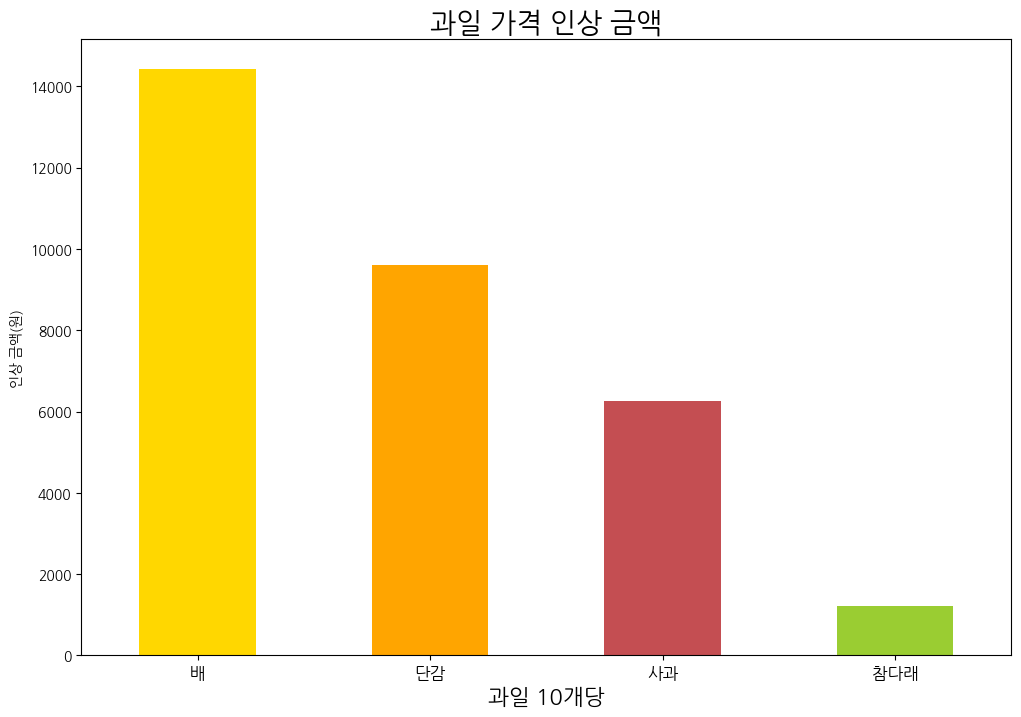

In [253]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.style.use('default')
plt.rc('font', family='NanumGothic')

fruit_colors = {
    '배': 'gold',
    '단감': 'orange',
    '사과': 'r',
    '참다래': 'yellowgreen',
}

ax = fruit_price_df.plot.bar(x='crop_kg', y='raise', color=[fruit_colors[crop] for crop in fruit_price_df['crop_kg']], figsize=(12, 8), legend=False)
plt.title('과일 가격 인상 금액', fontproperties=font_prop, fontsize=20)
plt.xlabel('과일 10개당', fontproperties=font_prop, fontsize=16)
plt.ylabel('인상 금액(원)', fontproperties=font_prop)
plt.xticks(rotation=0, fontsize=12)
 
plt.show()


##### DB업로드

In [254]:
conn=mysql.connector.connect(
    host='',
    port=,
    user='',
    password='',
    database='AutoFarming'
)
cur=conn.cursor(buffered=True)

In [17]:
sql='insert into korea_price_pct values (%s, %s, %s, %s, %s)'
for i, row in Korea_price_df.iterrows():
    cur.execute(sql,tuple(row))
    conn.commit()
conn.close()

In [255]:
sql='insert into fruit_price values (%s, %s, %s, %s)'
for i, row in fruit_price_df.iterrows():
    cur.execute(sql,tuple(row))
    conn.commit()
conn.close()